# Rotation and mirroring 

### Packages

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

## Invariance and equivariance

(a) Consider the group $G$ consisting of all rotation and mirroring matrices.

Define a function $f$ that takes as input an element of $G$ and an image and gives out the action of $G$ on the image, where the image is here considered as a signal. You can test your function by importing the image `barbara.bmp`, found on our course on GitHub. Or some other image that you would prefer. I highly recommend using `opencv` to import the image. 

The function should work so that $f(R, \text{image})$ is that image rotated 90 degrees, $f(S, \text{image})$ is that image mirrored along the $x$-axis and we have the relationship
$$f(g, f(h, \text{image})) = f(gh, image).$$
How is this function related to group actions?


Hint for constructing this: Since the group $G$ does not have that many elements, you can brute force it, using different standard rotation command and mirroring commands in `opencv`.
However, you can also interpret it as a a signal: The image is an array, but you can consider it as a function on a grid, sending points $[i,j]$ to $\text{image}[i,j]$. Then you somehow need to deal with the fact that, viewing it in this way, $i$ is the $y$-coordinate, and it is going from top to bottom rather than the other way around. Also, you would prefer that $(0,0)$ is in the middle of the image, rather than at the edge. So you first need to solve this.


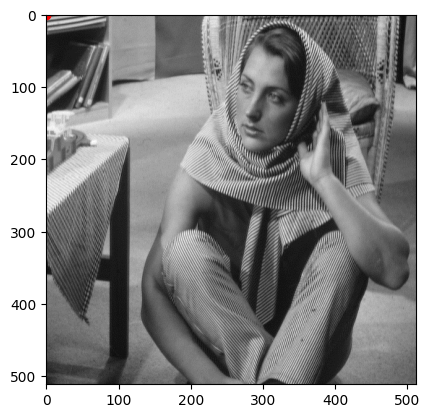

In [11]:
# Load test image
img = cv2.imread("../../lecture_notes/barbara.bmp",cv2.IMREAD_GRAYSCALE).astype(np.float32)
plt.imshow(img, cmap='gray')
plt.plot(0, 0, "ro")
plt.show()

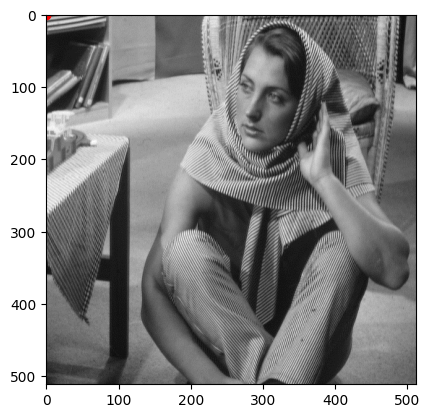

In [18]:
plt.imshow(img - 512//2, cmap='gray')
plt.plot(0, 0, "ro")

In [143]:
# Construct group G, using functinos developed on Monday (2. notebook)

def get_R():
    """Returns a 2x2 matrix that rotates the input vector by 90 degreees in the counter-clockwise direction."""
    return np.array([[0, -1], [1, 0]])

def get_S():
    """Returns a 2x2 matrix that mirrors the input vector around the x-axis."""
    return np.array([[1, 0], [0, -1]])

def get_possible_products(List0, max_num = 100):
    # Copy the input list
    List1 = List0.copy()
    
    # Continue until we have reached the maximum number of matrices
    # This will make it possible for higher products to be calculated
    while True:
        # Boolean value to check if we have added any new matrices
        any_new_matrices = False
        
        for i in range(len(List1)):
            for j in range(len(List1)):
                # For each matrix in List1, calculate the product with all other matrices in List1
                new_matrix = List1[i] @ List1[j]
                
                # Check is the new matrix is already in List1
                if not any(np.allclose(new_matrix, mat) for mat in List1):
                    List1.append(new_matrix)
                    any_new_matrices = True
        
        # Check if we have reached the maximum number of matrices
        # or if we have not added any new matrices
        if any_new_matrices is False or len(List1) >= max_num:
            break
        
    return List1

R, S = get_R(), get_S()
G = get_possible_products([R, S])

print(f"Number of possible products from [R, S]: {len(G)}")

Number of possible products from [R, S]: 8


In [171]:
# Perform the action of a matrix on an image
def perform_action(action, img):
    new_img = np.zeros_like(img)

    # Find the center of the image, as we want to rotate/flip etc. around this point
    c = np.array([img.shape[0]//2-1, img.shape[1]//2-1])

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Find the relative coordinated of the pixed (when origo is in the center)
            x = np.array([i, j]) - c
            
            # Perform the action on the relative coordinates and move the origin back to the top-left corner
            new_index = action @ x + c
            # Assign the pixel value to the new image idex
            new_img[int(new_index[1]), int(new_index[0])] = img[i, j]
            
    return new_img.T

Perform the following action: 
[[ 0 -1]
 [ 1  0]]:


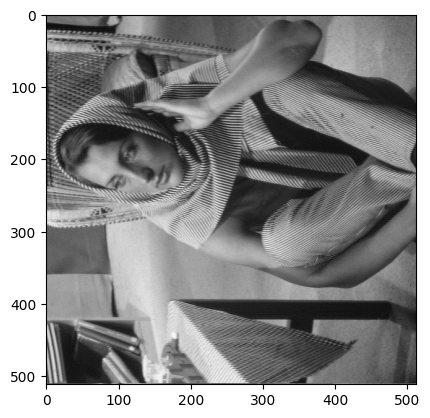

Perform the following action: 
[[ 1  0]
 [ 0 -1]]:


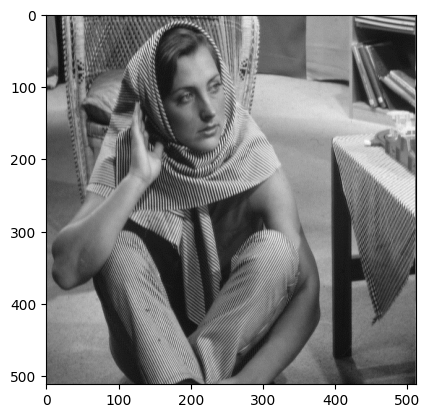

Perform the following action: 
[[-1  0]
 [ 0 -1]]:


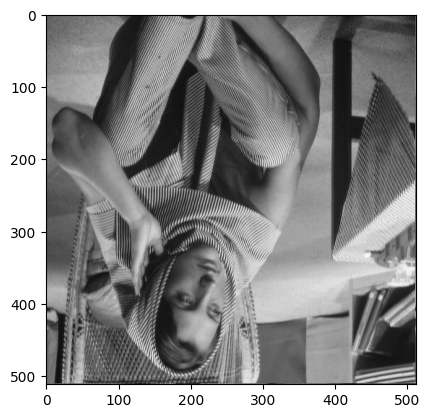

Perform the following action: 
[[0 1]
 [1 0]]:


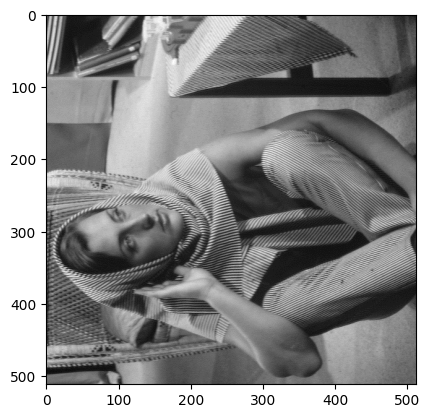

Perform the following action: 
[[ 0 -1]
 [-1  0]]:


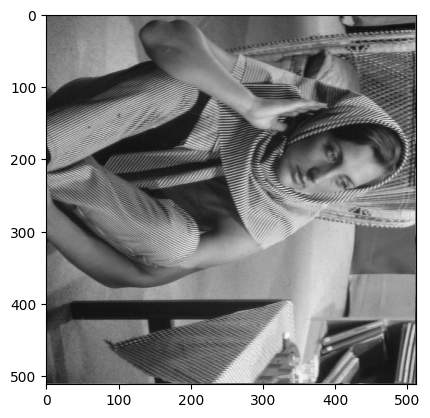

Perform the following action: 
[[1 0]
 [0 1]]:


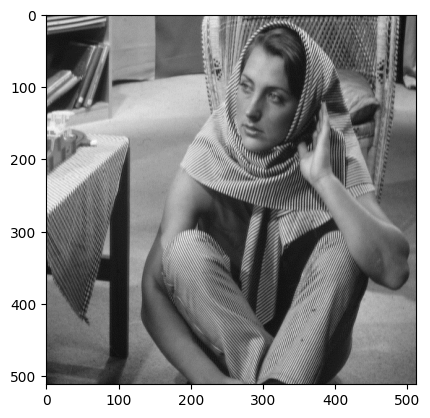

Perform the following action: 
[[-1  0]
 [ 0  1]]:


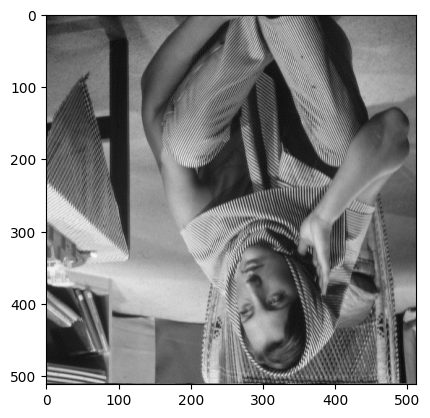

Perform the following action: 
[[ 0  1]
 [-1  0]]:


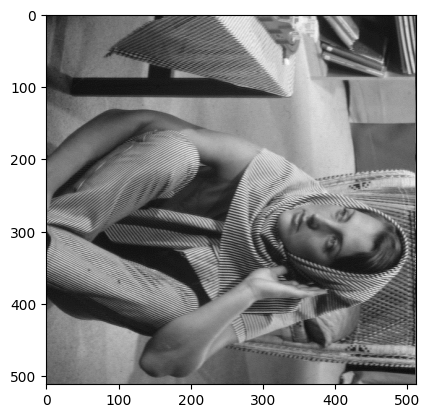

In [172]:
# Plot all actions
for action in G:
    new_image = perform_action(action, img)
    print(f"Perform the following action: \n{action}:")
    plt.imshow(new_image, cmap='gray')
    plt.show()

(b) Define a function $Convo(A,I)$ that takes as input a square matrix (filter) $A \in M_{n \times n}(\mathbb{R})$ and an image $I$ the result of the convolution of $A$ with $I$.
Test out your function with `barbara.bmp` or the other image you chose, with filters
$$
A_1 = \begin{pmatrix}
0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0
\end{pmatrix} \qquad
A_2 = \begin{pmatrix}
-1 & -2 & -1 \\ 0 & 0 &0 \\ 1 & 2 & 1
\end{pmatrix} \qquad 
A_3 = \begin{array}{c} \text{$200 \times 200$ matrix} \\
\text{1 at $[0,100]$, the rest is zero.}
\end{array}
$$

What does these filters do?
You can try some standard functions for the convolutions: for `opencv`, there is `cv2.filter2D`.

In [155]:
def Convo(A, I):
    img_conv = cv2.filter2D(src=I, ddepth=-1, kernel=A)
    return img_conv

# Sharpening filter
A1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Highlights horizontal lines
A2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Shift and mirror image along the horizontal line y=100
A3 = np.zeros((200, 200))
A3[0, 100] = 1

Apply the following convolution filter: 
[[ 0 -1]
 [ 1  0]]:


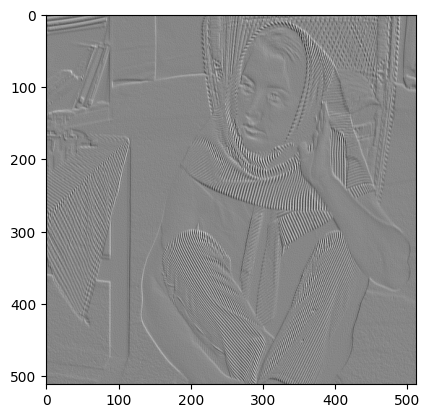

Apply the following convolution filter: 
[[ 1  0]
 [ 0 -1]]:


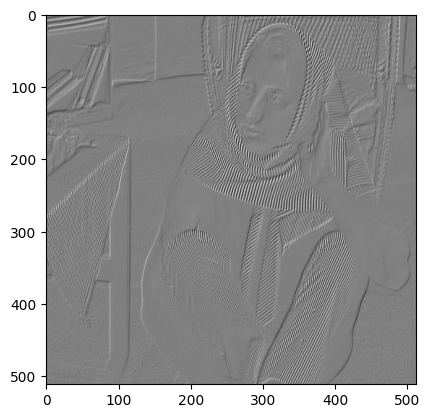

Apply the following convolution filter: 
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]:


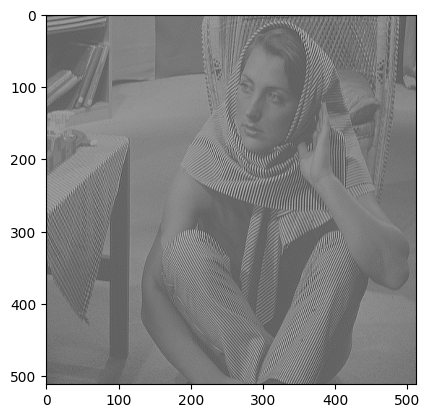

Apply the following convolution filter: 
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]:


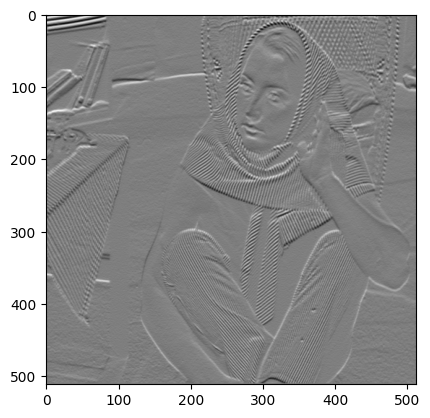

Apply the following convolution filter: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]:


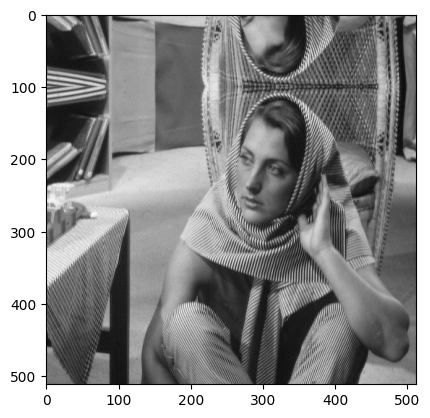

In [156]:
# Perform various convolutions
for filter in [G[0], G[1], A1, A2, A3]:
    conv_image = Convo(filter, img)
    print(f"Apply the following convolution filter: \n{filter}:")
    plt.imshow(conv_image, cmap='gray')
    plt.show()

(c) Define a new function $ConvG$ as follows:
* The function takes as input $g \in G$, a square matrix (filter) $A \in M_{n \times n}(\mathbb{R})$ and  an image $I$.
* $ConvG(g, A, I) = f(g^{-1}, Convo(A, f(g,I))).$


Test out your function with `barbara.bmp` or the other image you chose, with $R$ and $S$ and $A_1$, $A_2$ and $A_3$

In [157]:
def ConvG(g, A, I):
    img_action = perform_action(g, I)
    img_conv = cv2.filter2D(src=img_action, ddepth=-1, kernel=A)
    img_inverse_action = perform_action(action=np.linalg.inv(g), img=img_conv)
    return img_inverse_action

Apply the following convolution filter and action: 
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]] 
[[ 0 -1]
 [ 1  0]]:


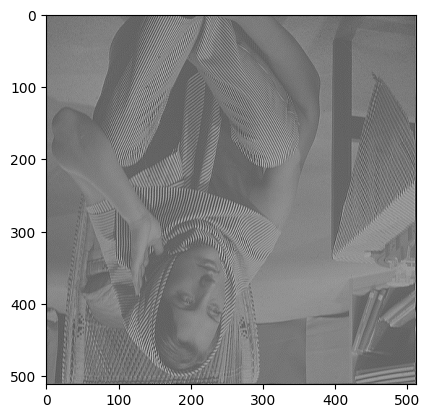

Apply the following convolution filter and action: 
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]] 
[[ 1  0]
 [ 0 -1]]:


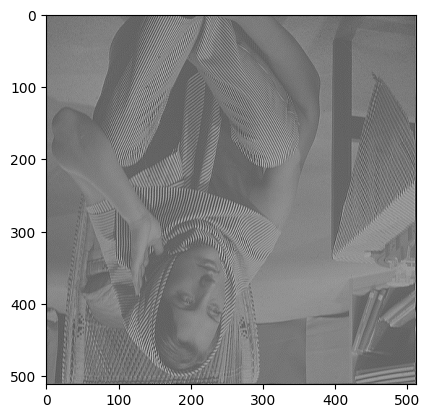

Apply the following convolution filter and action: 
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]] 
[[ 0 -1]
 [ 1  0]]:


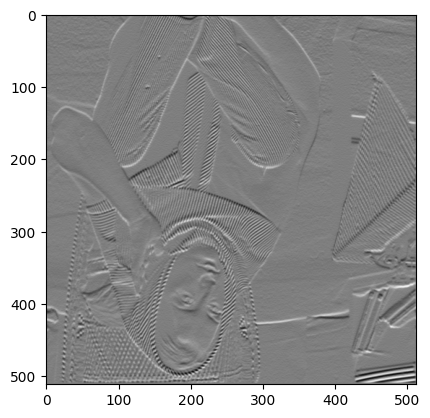

Apply the following convolution filter and action: 
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]] 
[[ 1  0]
 [ 0 -1]]:


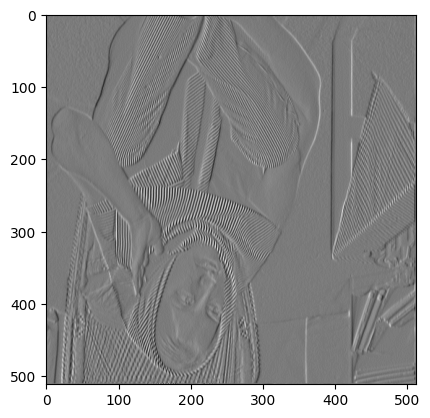

Apply the following convolution filter and action: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
[[ 0 -1]
 [ 1  0]]:


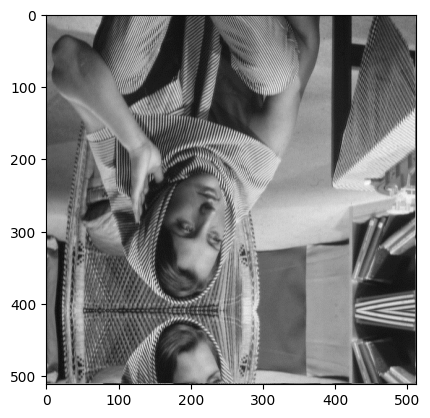

Apply the following convolution filter and action: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
[[ 1  0]
 [ 0 -1]]:


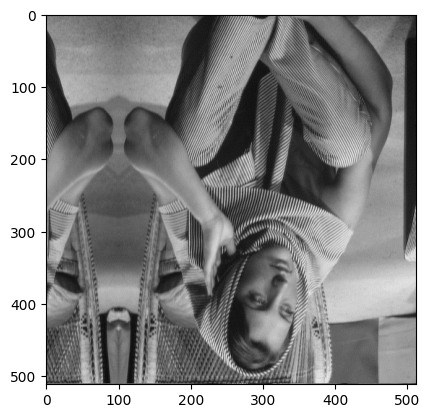

In [158]:
# Load test image
img = cv2.imread("../../lecture_notes/barbara.bmp",cv2.IMREAD_GRAYSCALE).astype(np.float32)

# Perform the new convolution
for filter in [A1, A2, A3]:
    for action in [R, S]:
        print(f"Apply the following convolution filter and action: \n{filter} \n{action}:")
        new_image = ConvG(g=action, A=filter, I=img)
        plt.imshow(new_image, cmap='gray')
        plt.show()

(d) We say that the convolution with respect to $A$ satisfy property $(p)$ if
$$ConvG(g, A, \text{image}) = ConvG(h, A,  \text{image})$$
for any $g,h \in G$ and any image. Is the property $(p)$ stating that $Convo(A, \cdot)$ is invariant or equivariant? Which of the matrices $A_1$, $A_2$, $A_3$
satisfy this mysterious property?

____

The matrix A1 satisfies the property, as the sharpending filter is not dependent on the 90-degrees orientation. Thus, the property is an invariant property. However, the A2 is since it hilights horizontal lines, ans A3 mirror along a horizontal axis.

___

(e) Whatever you decided property $(p)$ was, choose one of the matrices that whose convolution did not satisfy this property, and use averages over $G$ to force $(p)$ (invariance or equivariance)? What happens? Is this a good idea?

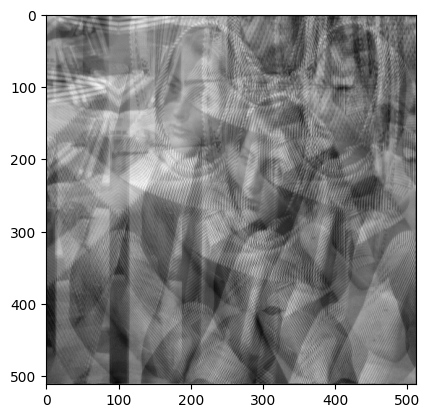

In [152]:
def smoothing_operator(group, func, A, x):
    F = 1 / len(G) * sum([func(g, A, x) for g in group])
    return F

average_image = smoothing_operator(group=G, func=ConvG, A=A3, x=img)
plt.imshow(average_image, cmap='gray')

This is not a good idea, as introducting a smoothing operator will force the result to be invariant. However, as the filter is not invariant, we are trying to force somthing that is not compatible with the true solution.